#### Setup and Imports

In [24]:
# Add src directory to path
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Project imports
from config import DATA_PATHS, THEME_KEYWORDS, APP_NAMES
from sentiment_analyzer import SentimentAnalyzer
from theme_analyzer import ThemeAnalyzer

# Display settings
pd.set_option('display.max_colwidth', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Create output directory
os.makedirs('../data/processed', exist_ok=True)

print("Setup complete!")

Setup complete!


#### Load Processed Reviews

In [2]:
# Load the preprocessed reviews from Task 1
df = pd.read_csv(r'C:\Users\User\Desktop\portproject\customer-experience-analytics-fintech-apps\data\processed\reviews_processed.csv')

print(f"Loaded {len(df)} reviews")
print(f"\nReviews per app:")
print(df['app_name'].value_counts())
print(f"\nColumns: {list(df.columns)}")

Loaded 7353 reviews

Reviews per app:
app_name
Commercial Bank of Ethiopia    5950
Bank of Abysinia               1009
Dashen                          394
Name: count, dtype: int64

Columns: ['review_id', 'review_text', 'rating', 'review_date', 'review_year', 'review_month', 'app_code', 'app_name', 'user_name', 'thumbs_up', 'text_length', 'source']


In [3]:
# Preview the data
df.head()

,review_id,review_text,rating,review_date,review_year,review_month,app_code,app_name,user_name,thumbs_up,text_length,source
0,2b184e78-5b24-4948-af50-ea702dc35ebd,"It’s very hard, it’s not working.👎👎",1,2026-02-11,2026,2,BOA,Bank of Abysinia,Yemaryam lij Yemaryam lij,0,35,Google Play
1,b642100d-0a91-4481-8719-d1ca5d02d5a2,v.good,5,2026-02-11,2026,2,BOA,Bank of Abysinia,Zerihun Beyene,0,6,Google Play
2,199f8774-a008-4b97-9981-35d7ce1cfb64,some time the app would have been a problem to open,5,2026-02-10,2026,2,BOA,Bank of Abysinia,Abraham Asrat,0,51,Google Play
3,45f2bcd3-fde8-4b9b-b49d-7426427aee27,good,5,2026-02-10,2026,2,BOA,Bank of Abysinia,Ferenjo Biftu Wako,0,4,Google Play
4,3e3f5f99-6936-4e16-8758-22e9e2162f87,Its not work accurately please improve your mobile banking,1,2026-02-03,2026,2,BOA,Bank of Abysinia,Yohannes Berhe,0,58,Google Play


### VADER Sentiment Analysis

In [4]:
# Initialize VADER analyzer
vader_analyzer = SentimentAnalyzer(method='vader')

# Analyze all reviews
df_vader = vader_analyzer.analyze_dataframe(df)

Initializing VADER sentiment analyzer...
VADER ready!

Analyzing sentiment for 7353 reviews using VADER...


Analyzing: 100%|██████████| 7353/7353 [00:00<00:00, 10794.05it/s]


SENTIMENT ANALYSIS SUMMARY

Overall Sentiment Distribution (VADER):
  POSITIVE: 4136 (56.2%)
  NEUTRAL: 2055 (27.9%)
  NEGATIVE: 1162 (15.8%)

Sentiment by App:
  Bank of Abysinia:
    Positive: 41.7% | Negative: 28.6%
  Commercial Bank of Ethiopia:
    Positive: 58.1% | Negative: 13.9%
  Dashen:
    Positive: 65.2% | Negative: 11.4%


#### VADER results preview

In [5]:
df_vader[['review_text', 'rating', 'sentiment_label_vader', 'sentiment_score_vader']].head(10)

,review_text,rating,sentiment_label_vader,sentiment_score_vader
0,"It’s very hard, it’s not working.👎👎",1,NEGATIVE,0.1761
1,v.good,5,NEUTRAL,0.0000
2,some time the app would have been a problem to open,5,NEGATIVE,0.4019
3,good,5,POSITIVE,0.4404
4,Its not work accurately please improve your mobile banking,1,POSITIVE,0.2354
5,the most doagusting app from ethiopian banking especially on weekdenda🤮🤮🤮🤮🤮🤮🤮,1,NEUTRAL,0.0000
6,wondo mechesa,5,NEUTRAL,0.0000
7,good but the user interface and animations need some upgrade,4,POSITIVE,0.2382
8,what is wrong these app ?,1,NEGATIVE,0.4767
9,very good app,5,POSITIVE,0.4927


#### DistilBERT Sentiment Analysis

In [6]:
# Initialize DistilBERT analyzer
distilbert_analyzer = SentimentAnalyzer(method='distilbert')

# Analyze all reviews (this takes longer)
df_sentiment = distilbert_analyzer.analyze_dataframe(df_vader)

Initializing DistilBERT sentiment analyzer...
(This may take a moment to download the model on first run)
Using CPU for inference


Loading weights: 100%|██████████| 104/104 [00:00<00:00, 606.73it/s, Materializing param=pre_classifier.weight]                                  


DistilBERT ready!

Analyzing sentiment for 7353 reviews using DISTILBERT...


Analyzing: 100%|██████████| 7353/7353 [04:12<00:00, 29.14it/s]


SENTIMENT ANALYSIS SUMMARY

Overall Sentiment Distribution (DISTILBERT):
  POSITIVE: 4162 (56.6%)
  NEGATIVE: 3191 (43.4%)

Sentiment by App:
  Bank of Abysinia:
    Positive: 38.1% | Negative: 61.9%
  Commercial Bank of Ethiopia:
    Positive: 59.1% | Negative: 40.9%
  Dashen:
    Positive: 66.2% | Negative: 33.8%


#### DistilBERT results preview

In [7]:
df_sentiment[['review_text', 'rating', 'sentiment_label_vader', 'sentiment_label_distilbert']].head(10) 

,review_text,rating,sentiment_label_vader,sentiment_label_distilbert
0,"It’s very hard, it’s not working.👎👎",1,NEGATIVE,NEGATIVE
1,v.good,5,NEUTRAL,POSITIVE
2,some time the app would have been a problem to open,5,NEGATIVE,NEGATIVE
3,good,5,POSITIVE,POSITIVE
4,Its not work accurately please improve your mobile banking,1,POSITIVE,NEGATIVE
5,the most doagusting app from ethiopian banking especially on weekdenda🤮🤮🤮🤮🤮🤮🤮,1,NEUTRAL,POSITIVE
6,wondo mechesa,5,NEUTRAL,POSITIVE
7,good but the user interface and animations need some upgrade,4,POSITIVE,NEGATIVE
8,what is wrong these app ?,1,NEGATIVE,NEGATIVE
9,very good app,5,POSITIVE,POSITIVE


#### Compare VADER vs DistilBERT

In [8]:
# Agreement rate between the two methods
agreement = (df_sentiment['sentiment_label_vader'] == df_sentiment['sentiment_label_distilbert']).mean()
print(f"Agreement rate: {agreement * 100:.1f}%")

# Confusion matrix
print("\nCross-tabulation (VADER vs DistilBERT):")
pd.crosstab(df_sentiment['sentiment_label_vader'], 
            df_sentiment['sentiment_label_distilbert'], 
            margins=True)

Agreement rate: 60.5%

Cross-tabulation (VADER vs DistilBERT):


sentiment_label_distilbert,NEGATIVE,POSITIVE,All
sentiment_label_vader,,,
NEGATIVE,1140,22,1162
NEUTRAL,1227,828,2055
POSITIVE,824,3312,4136
All,3191,4162,7353


#### Visualize comparison

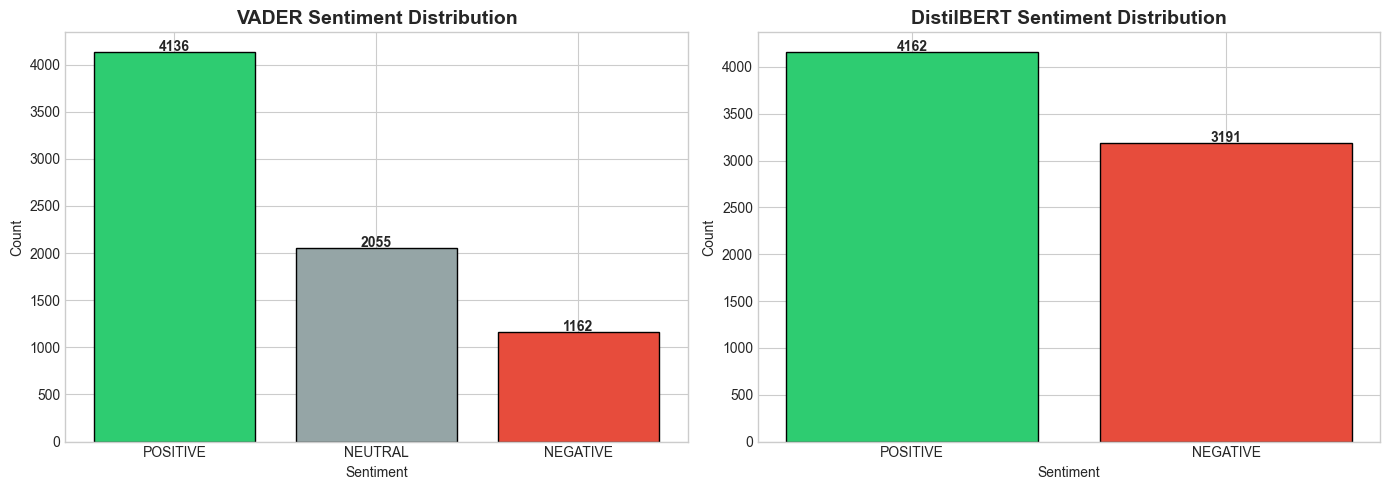

In [9]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# VADER distribution
ax1 = axes[0]
vader_counts = df_sentiment['sentiment_label_vader'].value_counts()
colors = {'POSITIVE': '#2ecc71', 'NEGATIVE': '#e74c3c', 'NEUTRAL': '#95a5a6'}
ax1.bar(vader_counts.index, vader_counts.values, 
        color=[colors.get(x, '#333') for x in vader_counts.index], edgecolor='black')
ax1.set_title('VADER Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')
for i, (label, count) in enumerate(vader_counts.items()):
    ax1.text(i, count + 10, str(count), ha='center', fontweight='bold')
    # DistilBERT distribution
ax2 = axes[1]
distilbert_counts = df_sentiment['sentiment_label_distilbert'].value_counts()
ax2.bar(distilbert_counts.index, distilbert_counts.values,
        color=[colors.get(x, '#333') for x in distilbert_counts.index], edgecolor='black')
ax2.set_title('DistilBERT Sentiment Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
for i, (label, count) in enumerate(distilbert_counts.items()):
    ax2.text(i, count + 10, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/sentiment_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### Sentiment by app

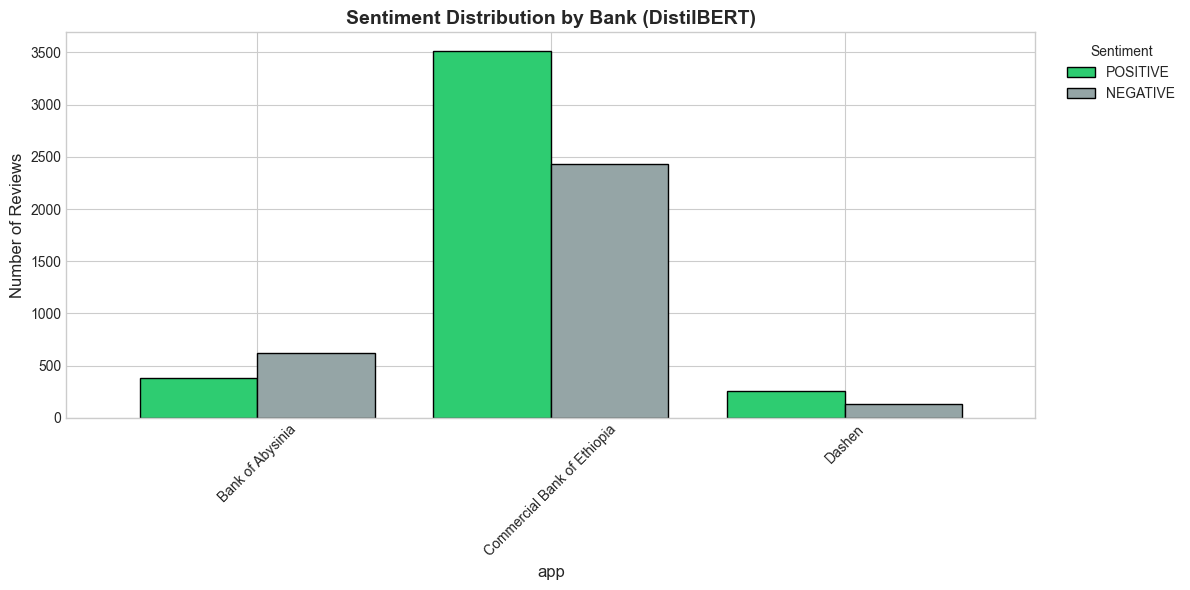

In [10]:
# Sentiment distribution by bank (using DistilBERT as primary)
fig, ax = plt.subplots(figsize=(12, 6))

sentiment_by_bank = df_sentiment.groupby(['app_name', 'sentiment_label_distilbert']).size().unstack(fill_value=0)

# Reorder columns
col_order = ['POSITIVE', 'NEUTRAL', 'NEGATIVE'] if 'NEUTRAL' in sentiment_by_bank.columns else ['POSITIVE', 'NEGATIVE']
sentiment_by_bank = sentiment_by_bank[[c for c in col_order if c in sentiment_by_bank.columns]]

sentiment_by_bank.plot(kind='bar', ax=ax, color=['#2ecc71', '#95a5a6', '#e74c3c'][:len(sentiment_by_bank.columns)], 
                       edgecolor='black', width=0.8)

ax.set_title('Sentiment Distribution by Bank (DistilBERT)', fontsize=14, fontweight='bold')
ax.set_xlabel('app', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)
ax.legend(title='Sentiment', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../data/processed/sentiment_by_app.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Sentiment percentage by app
print("Sentiment Percentage by app (DistilBERT):")
print("=" * 60)

for app in df_sentiment['app_name'].unique():
    app_df = df_sentiment[df_sentiment['app_name'] == app]
    total = len(app_df)
    pos = len(app_df[app_df['sentiment_label_distilbert'] == 'POSITIVE'])
    neg = len(app_df[app_df['sentiment_label_distilbert'] == 'NEGATIVE'])

    print(f"\n{app}:")
    print(f"  Positive: {pos} ({pos/total*100:.1f}%)")
    print(f"  Negative: {neg} ({neg/total*100:.1f}%)")
    print(f"  Satisfaction Score: {pos/total*100:.1f}%")

Sentiment Percentage by app (DistilBERT):

Bank of Abysinia:
  Positive: 384 (38.1%)
  Negative: 625 (61.9%)
  Satisfaction Score: 38.1%

Commercial Bank of Ethiopia:
  Positive: 3517 (59.1%)
  Negative: 2433 (40.9%)
  Satisfaction Score: 59.1%

Dashen:
  Positive: 261 (66.2%)
  Negative: 133 (33.8%)
  Satisfaction Score: 66.2%


### Sentiment vs Rating Correlation

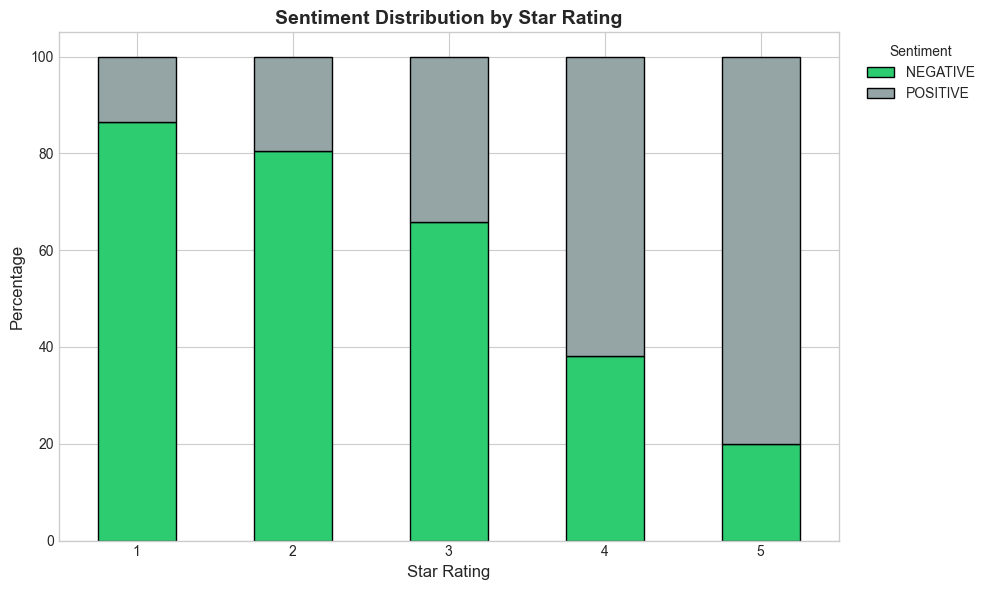


Observation: We expect 1-2 star reviews to be mostly NEGATIVE,
and 4-5 star reviews to be mostly POSITIVE.


In [12]:
# How well does sentiment match the star rating?
fig, ax = plt.subplots(figsize=(10, 6))

# Group by rating and sentiment
rating_sentiment = df_sentiment.groupby(['rating', 'sentiment_label_distilbert']).size().unstack(fill_value=0)

# Normalize to percentages
rating_sentiment_pct = rating_sentiment.div(rating_sentiment.sum(axis=1), axis=0) * 100

rating_sentiment_pct.plot(kind='bar', stacked=True, ax=ax, 
                          color=['#2ecc71', '#95a5a6', '#e74c3c'][:len(rating_sentiment_pct.columns)],
                          edgecolor='black')

ax.set_title('Sentiment Distribution by Star Rating', fontsize=14, fontweight='bold')
ax.set_xlabel('Star Rating', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(title='Sentiment', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('../data/processed/sentiment_vs_rating.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nObservation: We expect 1-2 star reviews to be mostly NEGATIVE,")
print("and 4-5 star reviews to be mostly POSITIVE.")

### Thematic Analysis

In [48]:
# Show predefined themes
print("Predefined Themes and Keywords:")
print("=" * 60)
for theme, keywords in THEME_KEYWORDS.items():
    print(f"\n{theme}:")
    print(f"  Keywords: {', '.join(keywords[:5])}...")

Predefined Themes and Keywords:

Account Access Issues:
  Keywords: login, password, authentication, forgot, reset...

Transaction Performance:
  Keywords: transfer, slow, fast, speed, loading...

User Interface & Experience:
  Keywords: ui, interface, design, layout, navigation...

Technical Issues:
  Keywords: crash, bug, error, freeze, hang...

Customer Support:
  Keywords: support, help, service, response, contact...

Feature Requests:
  Keywords: feature, add, need, want, wish...

Security & Privacy:
  Keywords: security, safe, secure, privacy, fingerprint...


In [49]:
# Initialize theme analyzer
theme_analyzer = ThemeAnalyzer()

# Analyze themes
df_final = theme_analyzer.analyze_dataframe(df_sentiment)

Initializing TF-IDF vectorizer...
TF-IDF ready!
Loading spaCy model...

Analyzing themes for 7353 reviews...

[1/2] Extracting keywords using TF-IDF...
[2/2] Mapping keywords to themes...


Identifying themes: 100%|██████████| 7353/7353 [00:00<00:00, 29976.73it/s]


THEMATIC ANALYSIS SUMMARY

Overall Theme Distribution:
  Transaction Performance: 1057 reviews (14.4%)
  Technical Issues: 825 reviews (11.2%)
  User Interface & Experience: 773 reviews (10.5%)
  Feature Requests: 742 reviews (10.1%)
  Customer Support: 485 reviews (6.6%)
  Account Access Issues: 436 reviews (5.9%)
  Security & Privacy: 275 reviews (3.7%)

  Reviews with no identified theme: 4436 (60.3%)

Top Theme by App:
  Bank of Abysinia: Technical Issues (185 mentions)
  Commercial Bank of Ethiopia: Transaction Performance (859 mentions)
  Dashen: Transaction Performance (63 mentions)


#### Preview theme results

In [50]:
df_final[['review_text', 'primary_theme', 'themes', 'matched_keywords']].head(10)

,review_text,primary_theme,themes,matched_keywords
0,"It’s very hard, it’s not working.👎👎",Technical Issues,[Technical Issues],[not working]
1,v.good,Other,[],[]
2,some time the app would have been a problem to open,Technical Issues,[Technical Issues],[problem]
3,good,Other,[],[]
4,Its not work accurately please improve your mobile banking,Feature Requests,[Feature Requests],[improve]
5,the most doagusting app from ethiopian banking especially on weekdenda🤮🤮🤮🤮🤮🤮🤮,Other,[],[]
6,wondo mechesa,Other,[],[]
7,good but the user interface and animations need some upgrade,User Interface & Experience,"[User Interface & Experience, Feature Requests]","[interface, need]"
8,what is wrong these app ?,Other,[],[]
9,very good app,Other,[],[]


#### Theme Distribution

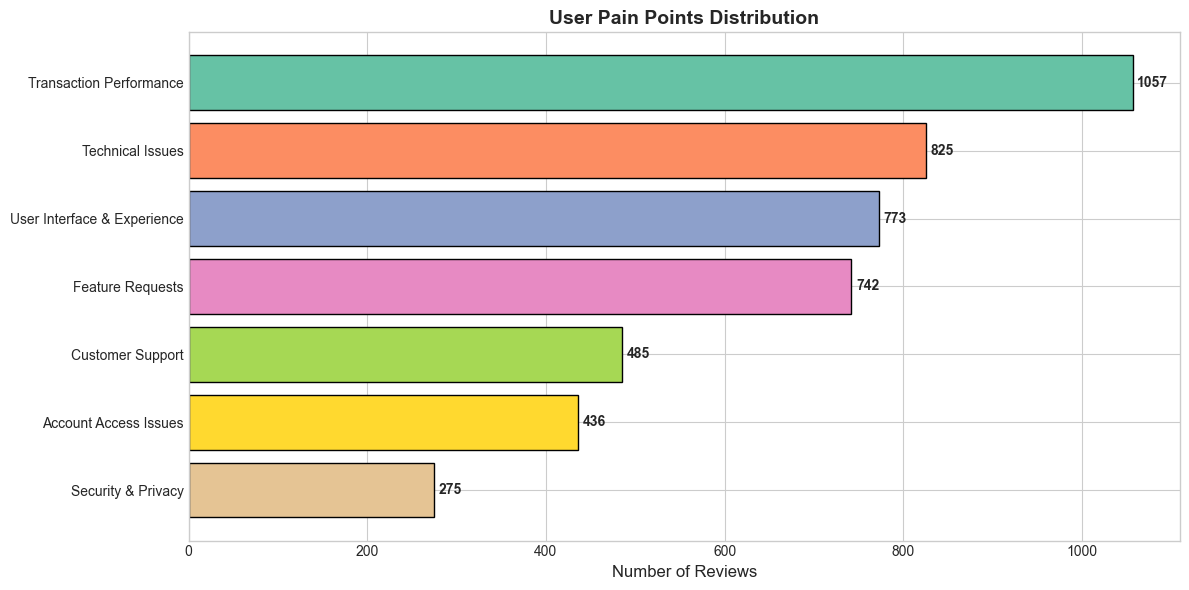

In [51]:
# Overall theme distribution
all_themes = []
for themes in df_final['themes']:
    if isinstance(themes, list):
        all_themes.extend(themes)
    elif isinstance(themes, str):
        # Handle string representation of list
        import ast
        try:
            all_themes.extend(ast.literal_eval(themes))
        except:
            pass

theme_counts = Counter(all_themes)

fig, ax = plt.subplots(figsize=(12, 6))

themes = [t[0] for t in theme_counts.most_common()]
counts = [t[1] for t in theme_counts.most_common()]

colors = sns.color_palette('Set2', len(themes))
bars = ax.barh(themes, counts, color=colors, edgecolor='black')
# Add count labels
for bar, count in zip(bars, counts):
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
            str(count), va='center', fontweight='bold')

ax.set_xlabel('Number of Reviews', fontsize=12)
ax.set_title('User Pain Points Distribution', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Most common at top

plt.tight_layout()
plt.savefig('../data/processed/theme_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

#### Themes by app

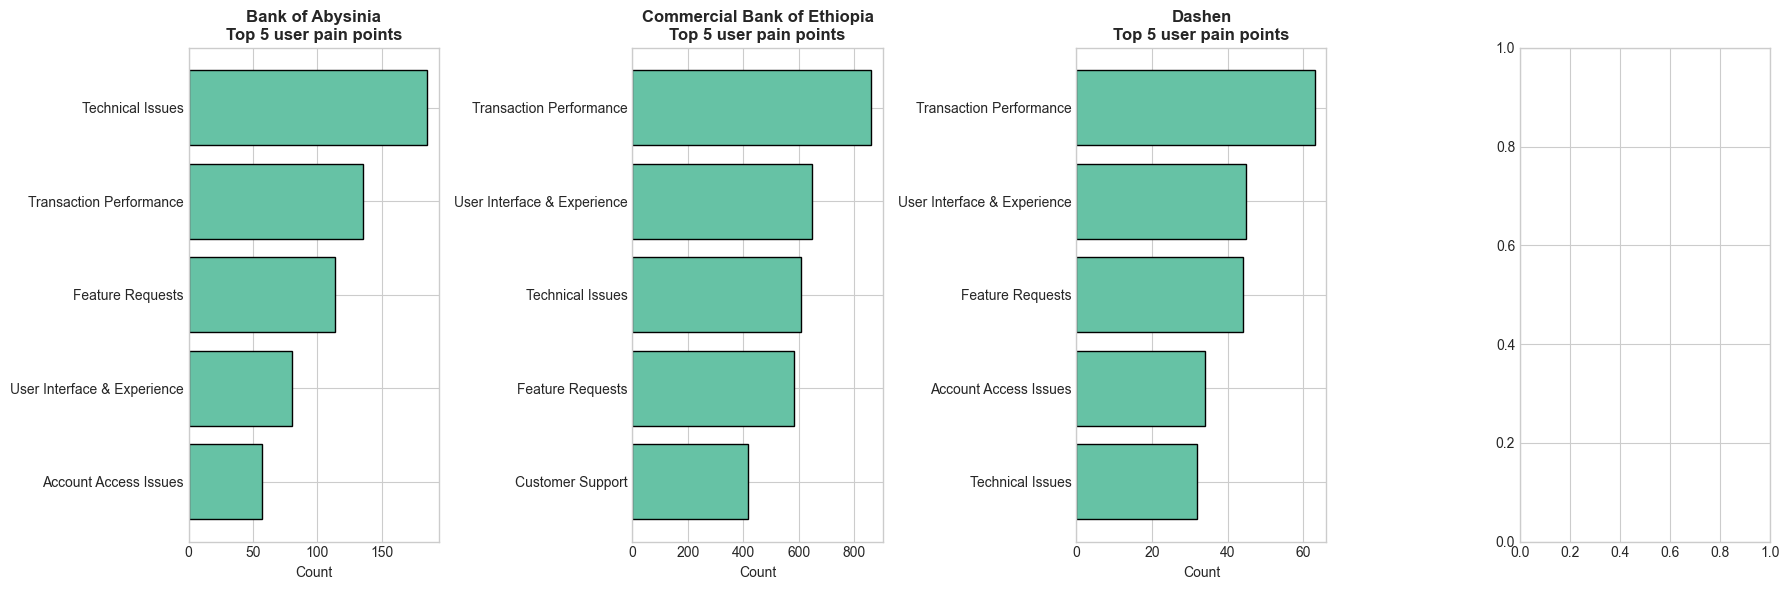

In [52]:
# Theme distribution by app
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

for idx, app in enumerate(df_final['app_name'].unique()):
    ax = axes[idx]
    app_df = df_final[df_final['app_name'] == app]

    app_themes = []

    for themes in app_df['themes']:
        if isinstance(themes, list):
            app_themes.extend(themes)

        elif isinstance(themes, str):
            try:
                app_themes.extend(ast.literal_eval(themes))
            except:
                pass

    # ✅ FIX: this block is now correctly indented
    if app_themes:
        app_theme_counts = Counter(app_themes).most_common(5)
        themes = [t[0] for t in app_theme_counts]
        counts = [t[1] for t in app_theme_counts]

        ax.barh(
            themes,
            counts,
            edgecolor='black'
        )
        ax.set_xlabel('Count')
        ax.set_title(f'{app}\nTop 5 user pain points', fontsize=12, fontweight='bold')
        ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../data/processed/themes_by_app.png', dpi=300, bbox_inches='tight')
plt.show()

### Theme-Sentiment Correlation

In [53]:
# Calculate theme-sentiment correlation
correlation_df = theme_analyzer.get_theme_sentiment_correlation(df_final)


Theme-Sentiment Correlation:
------------------------------------------------------------
  👍 Account Access Issues:
      Positive: 55.5% | Negative: 28.4%
  👍 Transaction Performance:
      Positive: 53.1% | Negative: 24.9%
  👍 User Interface & Experience:
      Positive: 73.1% | Negative: 19.9%
  👎 Technical Issues:
      Positive: 32.2% | Negative: 45.3%
  👍 Customer Support:
      Positive: 68.5% | Negative: 24.1%
  👍 Feature Requests:
      Positive: 66.3% | Negative: 21.2%
  👍 Security & Privacy:
      Positive: 67.6% | Negative: 19.6%


#### Visualize theme-sentiment correlation

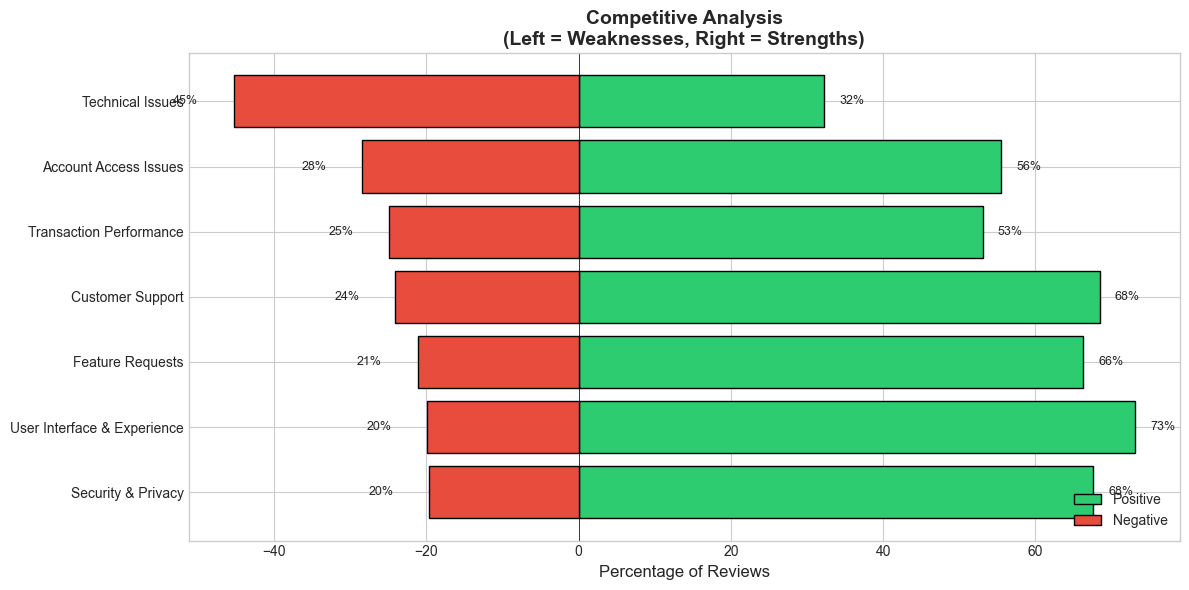

In [54]:
if correlation_df is not None and len(correlation_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    # Sort by negative percentage (pain points first)
    correlation_df = correlation_df.sort_values('negative_pct', ascending=True)
    themes = correlation_df['theme']
    pos_pct = correlation_df['positive_pct']
    neg_pct = correlation_df['negative_pct']
    y_pos = range(len(themes))
     # Create horizontal bar chart
    ax.barh(y_pos, pos_pct, color='#2ecc71', label='Positive', edgecolor='black')
    ax.barh(y_pos, -neg_pct, color='#e74c3c', label='Negative', edgecolor='black')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(themes)
    ax.set_xlabel('Percentage of Reviews', fontsize=12)
    ax.set_title('Competitive Analysis\n(Left = Weaknesses, Right = Strengths)', 
                 fontsize=14, fontweight='bold')
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.legend(loc='lower right')
    
    # Add percentage labels
    for i, (p, n) in enumerate(zip(pos_pct, neg_pct)):
        ax.text(p + 2, i, f'{p:.0f}%', va='center', fontsize=9)
        ax.text(-n - 8, i, f'{n:.0f}%', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('../data/processed/theme_sentiment_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()

#### Key Insights

In [55]:
# Generate key insights
print("=" * 60)
print("KEY INSIGHTS FROM SENTIMENT & THEMATIC ANALYSIS")
print("=" * 60)

# 1. Overall sentiment
total = len(df_final)
pos_total = len(df_final[df_final['sentiment_label_distilbert'] == 'POSITIVE'])
neg_total = len(df_final[df_final['sentiment_label_distilbert'] == 'NEGATIVE'])

print(f"\n1. OVERALL SENTIMENT")
print(f"   Total reviews analyzed: {total}")
print(f"   Positive: {pos_total} ({pos_total/total*100:.1f}%)")
print(f"   Negative: {neg_total} ({neg_total/total*100:.1f}%)")

# 2. Best and worst performing bank
print(f"\n2. App COMPARISON")
app_scores = {}
for app in df_final['app_name'].unique():
    app_df = df_final[df_final['app_name'] == app]
    pos = len(app_df[app_df['sentiment_label_distilbert'] == 'POSITIVE'])
    app_scores[app] = pos / len(app_df) * 100
    best_app = max(app_scores, key=app_scores.get)
worst_app = min(app_scores, key=app_scores.get)

print(f"   Best satisfaction: {best_app} ({app_scores[best_app]:.1f}% positive)")
print(f"   Needs improvement: {worst_app} ({app_scores[worst_app]:.1f}% positive)")

# 3. Top pain points (themes with highest negative %)
print(f"\n3. TOP PAIN POINTS (Themes with most negative reviews)")
if correlation_df is not None:
    pain_points = correlation_df.nlargest(3, 'negative_pct')
    for _, row in pain_points.iterrows():
        print(f"   - {row['theme']}: {row['negative_pct']:.1f}% negative")

# 4. Satisfaction drivers (themes with highest positive %)
print(f"\n4. SATISFACTION DRIVERS (Themes with most positive reviews)")
if correlation_df is not None:
    drivers = correlation_df.nlargest(3, 'positive_pct')
    for _, row in drivers.iterrows():
        print(f"   - {row['theme']}: {row['positive_pct']:.1f}% positive")

KEY INSIGHTS FROM SENTIMENT & THEMATIC ANALYSIS

1. OVERALL SENTIMENT
   Total reviews analyzed: 7353
   Positive: 4162 (56.6%)
   Negative: 3191 (43.4%)

2. App COMPARISON
   Best satisfaction: Dashen (66.2% positive)
   Needs improvement: Bank of Abysinia (38.1% positive)

3. TOP PAIN POINTS (Themes with most negative reviews)
   - Technical Issues: 45.3% negative
   - Account Access Issues: 28.4% negative
   - Transaction Performance: 24.9% negative

4. SATISFACTION DRIVERS (Themes with most positive reviews)
   - User Interface & Experience: 73.1% positive
   - Customer Support: 68.5% positive
   - Security & Privacy: 67.6% positive


### Sample Reviews by Theme

In [56]:
# Show sample reviews for top themes
print("Sample Reviews by Theme")
print("=" * 60)

for theme in list(THEME_KEYWORDS.keys())[:4]:  # Top 4 themes
    print(f"\n{theme}")
    print("-" * 40)
    
    # Find reviews with this theme
    theme_reviews = df_final[df_final['primary_theme'] == theme]
    
    if len(theme_reviews) > 0:
        # Show one positive and one negative
        pos_review = theme_reviews[theme_reviews['sentiment_label_distilbert'] == 'POSITIVE'].head(1)
        neg_review = theme_reviews[theme_reviews['sentiment_label_distilbert'] == 'NEGATIVE'].head(1)
        
        if len(pos_review) > 0:
            print(f"  [POSITIVE] \"{pos_review['review_text'].values[0][:150]}...\"")
        if len(neg_review) > 0:
            print(f"  [NEGATIVE] \"{neg_review['review_text'].values[0][:150]}...\"")
    else:
        print("  No reviews found for this theme.")

Sample Reviews by Theme

Account Access Issues
----------------------------------------
  [POSITIVE] "This the best mobile banking App BOA mobile banking included all digital banking features and we can access the most companies and sectors with this A..."
  [NEGATIVE] "Problems with internet, the app sometimes says there is no internet connection while Internet Data is on. this needs to be fixed, it's unacceptable no..."

Transaction Performance
----------------------------------------
  [POSITIVE] "fast..."
  [NEGATIVE] "it's too slow and when you are in a hurry don't use this app..."

User Interface & Experience
----------------------------------------
  [POSITIVE] "an app with very attractive GUI..."
  [NEGATIVE] "good but the user interface and animations need some upgrade..."

Technical Issues
----------------------------------------
  [POSITIVE] "Nice to meet you my proud bank in Ethiopia.. I'm a member of this bank, i need to solve my problem of international receiving money fo

### Save Results

In [58]:
# Save final results with sentiment and themes
output_path = r'C:\Users\User\Desktop\portproject\customer-experience-analytics-fintech-apps\data\processed\reviews_with_sentiment.csv'
df_final.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

# Show final columns
print(f"\nFinal dataset columns:")
for col in df_final.columns:
    print(f"  - {col}")

Results saved to C:\Users\User\Desktop\portproject\customer-experience-analytics-fintech-apps\data\processed\reviews_with_sentiment.csv

Final dataset columns:
  - review_id
  - review_text
  - rating
  - review_date
  - review_year
  - review_month
  - app_code
  - app_name
  - user_name
  - thumbs_up
  - text_length
  - source
  - sentiment_label_vader
  - sentiment_score_vader
  - sentiment_label_distilbert
  - sentiment_score_distilbert
  - themes
  - primary_theme
  - matched_keywords
  - tfidf_keywords
